# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 37

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,6.046512,26,28.240152,4.3,4.670487,2.180197,4.480542,2.154335
194,Casilla,Leeds United,41,2.000000,11,8.530183,5.5,4.265092,6.204777,4.967178,2.106379
560,Kelleher,Liverpool,45,2.000000,10,8.396564,5.0,4.198282,NaN,4.939123,1.979089
523,Forster,Southampton,40,7.894737,30,29.620706,3.8,3.751956,5.054647,3.582006,1.875978
12,Martínez,Aston Villa,54,37.346939,183,161.755902,4.9,4.331169,3.559039,4.117779,1.863838
548,Mendy,Chelsea,52,30.217391,139,126.175072,4.6,4.175578,5.905516,3.985633,1.831112
213,Meslier,Leeds United,48,35.000000,154,137.078207,4.4,3.916520,3.454214,4.622288,1.787639
597,Sánchez,Brighton,45,26.052632,99,97.753612,3.8,3.752159,2.892475,3.550633,1.768785
417,Johnstone,West Brom,46,36.052632,137,136.658682,3.8,3.790533,4.476972,3.579572,1.767345


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
109,Rüdiger,Chelsea,47,18.039216,92,80.050558,5.1,4.437585,5.952931,4.229727,2.046905
273,Stones,Manchester City,51,21.034483,122,96.798159,5.8,4.601880,1.986388,4.841146,2.037747
277,Cancelo,Manchester City,58,28.163265,138,137.712490,4.9,4.889791,2.228043,5.148650,2.030375
75,Bernardo,Brighton,39,2.941176,5,11.775036,1.7,4.003512,NaN,3.666324,2.027257
39,Hause,Aston Villa,44,6.000000,30,25.329965,5.0,4.221661,2.050936,3.648572,2.012598
123,James,Chelsea,51,30.833333,111,133.123436,3.6,4.317517,3.208157,4.101580,1.911829
104,Alonso,Chelsea,56,12.954545,57,58.207755,4.4,4.493230,3.390098,4.258384,1.898736
232,Chilwell,Chelsea,59,26.200000,131,120.581819,5.0,4.602359,6.020847,4.381826,1.894761
67,Veltman,Brighton,43,28.235294,96,105.468758,3.4,3.735352,4.847316,3.464935,1.801347


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,55,28.035714,157,141.041807,5.6,5.030791,3.395044,5.211650,2.145136
301,Lingard,West Ham,66,14.927536,103,76.584379,6.9,5.130410,3.586452,5.513063,1.997009
570,Raphinha,Leeds United,55,29.090909,128,127.079984,4.4,4.368374,3.971359,5.320638,1.862681
105,Jorginho,Chelsea,47,27.142857,114,108.108856,4.2,3.982958,3.941175,3.878198,1.837201
272,De Bruyne,Manchester City,118,24.150943,128,152.018560,5.3,6.294518,NaN,6.539732,1.832405
302,Fernandes,Manchester Utd,114,36.969697,244,227.033240,6.6,6.141063,4.877850,5.736807,1.818826
24,Saka,Arsenal,51,31.388889,113,126.998959,3.6,4.045985,3.077760,3.749275,1.791592
203,Harrison,Leeds United,56,35.227273,155,144.953705,4.4,4.114815,4.540813,4.952505,1.738827
284,Foden,Manchester City,61,26.875000,129,114.860901,4.8,4.273894,4.523298,4.413431,1.730449


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
699,Jebbison,Sheffield Utd,45,3.030303,10,12.400000,3.3,4.092000,NaN,4.615514,1.928987
506,Wilson,Newcastle Utd,65,25.769231,134,122.490455,5.2,4.753361,5.533333,4.717642,1.864422
202,Bamford,Leeds United,66,36.862745,188,176.472500,5.1,4.787286,4.073682,5.684847,1.863449
388,Kane,Tottenham,119,34.117647,232,214.569318,6.8,6.289101,5.700000,5.897873,1.823119
514,Watkins,Aston Villa,64,36.086957,166,165.555682,4.6,4.587688,5.593448,3.950873,1.813443
437,Antonio,West Ham,66,25.217391,116,117.042045,4.6,4.641322,5.450000,4.955028,1.806632
164,Calvert-Lewin,Everton,75,31.960784,163,152.410455,5.1,4.768671,4.700000,3.870693,1.741272
91,Wood,Burnley,65,32.380952,136,139.345227,4.2,4.303308,5.638582,4.592891,1.687896
224,Vardy,Leicester City,102,32.830189,174,174.097727,5.3,5.302977,3.478391,5.415370,1.660426


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
608,Carson,Manchester City,39,1.000000,7,8.773191,7.0,8.773191,8.971396,4.442478
272,De Bruyne,Manchester City,118,24.150943,128,152.018560,5.3,6.294518,6.539732,1.832405
388,Kane,Tottenham,119,34.117647,232,214.569318,6.8,6.289101,5.897873,1.823119
302,Fernandes,Manchester Utd,114,36.969697,244,227.033240,6.6,6.141063,5.736807,1.818826
254,Salah,Liverpool,129,36.290323,225,221.933557,6.2,6.115502,7.016510,1.702697
224,Vardy,Leicester City,102,32.830189,174,174.097727,5.3,5.302977,5.415370,1.660426
251,Mané,Liverpool,117,34.042553,160,178.650646,4.7,5.247863,6.012431,1.534227
390,Son,Tottenham,97,35.967742,223,188.712990,6.2,5.246729,4.904155,1.684623
301,Lingard,West Ham,66,14.927536,103,76.584379,6.9,5.130410,5.513063,1.997009


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,6.046512,4.3,4.670487,2.180197,4.480542,4.480542,2.154335
271,Gündogan,Manchester City,55,28.035714,5.6,5.030791,3.395044,5.211650,5.211650,2.145136
194,Casilla,Leeds United,41,2.000000,5.5,4.265092,6.204777,4.967178,4.967178,2.106379
109,Rüdiger,Chelsea,47,18.039216,5.1,4.437585,5.952931,4.229727,4.229727,2.046905
273,Stones,Manchester City,51,21.034483,5.8,4.601880,1.986388,4.841146,4.841146,2.037747
277,Cancelo,Manchester City,58,28.163265,4.9,4.889791,2.228043,5.148650,5.148650,2.030375
75,Bernardo,Brighton,39,2.941176,1.7,4.003512,NaN,3.666324,3.666324,2.027257
39,Hause,Aston Villa,44,6.000000,5.0,4.221661,2.050936,3.648572,3.648572,2.012598
301,Lingard,West Ham,66,14.927536,6.9,5.130410,3.586452,5.513063,5.513063,1.997009


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
259,Alexander-Arnold,Liverpool,78,35.227273,155,171.559483,4.4,4.870076,7.270250,5.863803,1.743767
254,Salah,Liverpool,129,36.290323,225,221.933557,6.2,6.115502,7.075678,7.016510,1.702697
194,Casilla,Leeds United,41,2.000000,11,8.530183,5.5,4.265092,6.204777,4.967178,2.106379
233,Iheanacho,Leicester City,62,24.000000,108,94.556818,4.5,3.939867,6.130055,4.011851,1.582289
352,Jack Robinson,Sheffield Utd,42,10.000000,26,30.267084,2.6,3.026708,6.075422,3.569594,1.476882
500,Havertz,Chelsea,83,25.714286,90,92.797649,3.5,3.608797,6.069694,3.505514,1.252632
481,Pereira,West Brom,54,33.260870,153,132.353455,4.6,3.979254,6.013464,4.166549,1.712398
307,Tuanzebe,Manchester Utd,41,8.333333,5,15.887757,0.6,1.906531,6.002093,2.138719,0.941568
573,Olsen,Everton,45,6.944444,25,24.468714,3.6,3.523495,6.001046,2.971736,1.660991


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
608,Carson,Manchester City,39,1.000000,7,8.773191,7.0,8.773191,8.971396,4.442478
254,Salah,Liverpool,129,36.290323,225,221.933557,6.2,6.115502,7.016510,1.702697
272,De Bruyne,Manchester City,118,24.150943,128,152.018560,5.3,6.294518,6.539732,1.832405
251,Mané,Liverpool,117,34.042553,160,178.650646,4.7,5.247863,6.012431,1.534227
388,Kane,Tottenham,119,34.117647,232,214.569318,6.8,6.289101,5.897873,1.823119
259,Alexander-Arnold,Liverpool,78,35.227273,155,171.559483,4.4,4.870076,5.863803,1.743767
302,Fernandes,Manchester Utd,114,36.969697,244,227.033240,6.6,6.141063,5.736807,1.818826
202,Bamford,Leeds United,66,36.862745,188,176.472500,5.1,4.787286,5.684847,1.863449
301,Lingard,West Ham,66,14.927536,103,76.584379,6.9,5.130410,5.513063,1.997009


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
254,Salah,Liverpool,129,36.290323,6.2,6.115502,7.016510,1.702697,20.3,6.2,26.5,0.730222
388,Kane,Tottenham,119,34.117647,6.8,6.289101,5.897873,1.823119,19.9,7.3,27.2,0.797241
224,Vardy,Leicester City,102,32.830189,5.3,5.302977,5.415370,1.660426,18.0,4.9,22.9,0.697529
202,Bamford,Leeds United,66,36.862745,5.1,4.787286,5.684847,1.863449,16.3,4.1,20.4,0.553404
514,Watkins,Aston Villa,64,36.086957,4.6,4.587688,3.950873,1.813443,16.0,4.2,20.2,0.559759
302,Fernandes,Manchester Utd,114,36.969697,6.6,6.141063,5.736807,1.818826,15.4,11.0,26.4,0.714098
164,Calvert-Lewin,Everton,75,31.960784,5.1,4.768671,3.870693,1.741272,15.2,2.0,17.2,0.538160
251,Mané,Liverpool,117,34.042553,4.7,5.247863,6.012431,1.534227,14.5,5.5,20.0,0.587500
91,Wood,Burnley,65,32.380952,4.2,4.303308,4.592891,1.687896,13.1,2.2,15.3,0.472500


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week31,assists_week32,assists_week33,assists_week34,assists_week35,assists_week36,assists_week37,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,...,xG_week33,xG_week34,xG_week35,xG_week36,xG_week37,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 31,xPoints week 32,xPoints week 33,xPoints week 34,xPoints week 35,xPoints week 36,xPoints week 37,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
468,79.217765,4.380276,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9,225,25.0,0.0,5.417765,4,NaN,0.0,0.0,0.0,...,0.5,NaN,0.5,NaN,NaN,0.2,0.1,0.2,0.6,0.4,0.5,NaN,NaN,5.122456,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.072532,3.949329,NaN,2.5,4.5,4.667879,5.949569,3.8,NaN,6.772532,NaN,NaN,3.020242,1.5,5.22313,6.6,4.201897,8.772532,2


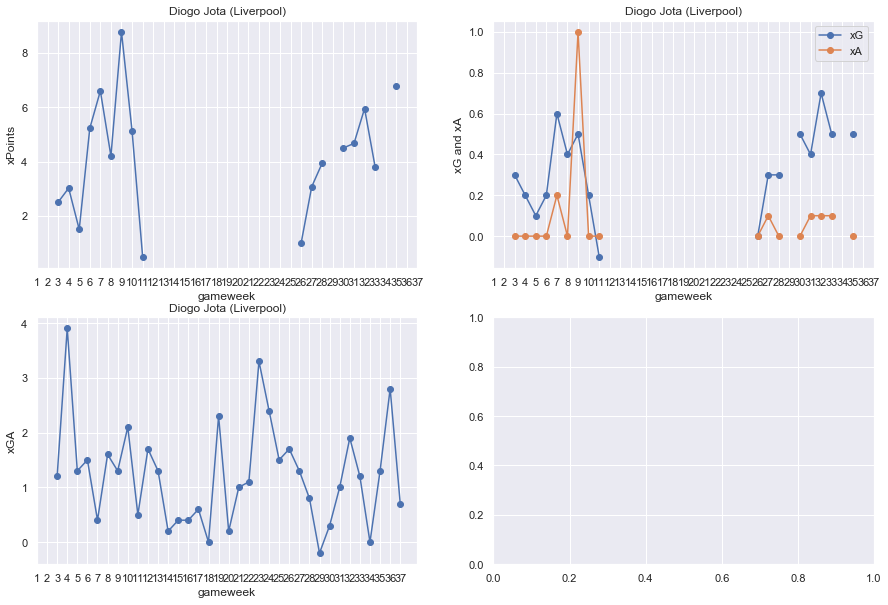

In [14]:
# find player index
name_string = 'Jota'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('Raphinha'),'web_name']

id
570    Raphinha
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,558,16,259,570,302,254,301,388,202,166] #vardy=224, grealish=37, mane=251
my_subs = [597,23,156,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 59.63209857620878
Expected points next gameweek: 63.23553145510613


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,37.346939,4.9,4.331169,3.559039,3.477748,4.117779,4.117779,1.863838
558,Coufal,West Ham,48,32.777778,3.6,3.827504,4.026595,3.571390,4.293451,4.293451,1.747009
16,Holding,Arsenal,43,28.823529,3.4,3.402490,3.069083,3.432443,3.396814,3.396814,1.640827
259,Alexander-Arnold,Liverpool,78,35.227273,4.4,4.870076,6.256546,7.270250,5.863803,5.863803,1.743767
570,Raphinha,Leeds United,55,29.090909,4.4,4.368374,3.971359,4.719299,5.320638,5.320638,1.862681
302,Fernandes,Manchester Utd,114,36.969697,6.6,6.141063,4.877850,4.720375,5.736807,5.736807,1.818826
254,Salah,Liverpool,129,36.290323,6.2,6.115502,8.124616,7.075678,7.016510,7.016510,1.702697
301,Lingard,West Ham,66,14.927536,6.9,5.130410,3.586452,5.131433,5.513063,5.513063,1.997009
388,Kane,Tottenham,119,34.117647,6.8,6.289101,5.700000,5.933333,5.897873,5.897873,1.823119



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,26.052632,3.8,3.752159,2.892475,3.833638,3.550633,3.550633,1.768785
23,Smith Rowe,Arsenal,42,19.189189,3.7,3.443842,4.079771,3.588891,3.264275,3.264275,1.680423
156,Keane,Everton,50,34.324324,3.7,3.210086,3.450205,3.186760,2.526898,2.526898,1.435594
74,White,Brighton,45,35.517241,2.9,3.213435,2.573012,3.193906,2.982419,2.982419,1.514828


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)